# Label Engineering

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [2]:
df_members = pd.read_csv('data/members_filtered.csv')
df_transactions = pd.read_csv('data/transactions_filtered.csv')
print(f"members:{df_members.shape}")
print(f"transactions:{df_transactions.shape}")

members:(400000, 7)
transactions:(4812931, 10)


In [3]:
df_logs = pd.read_csv('data/user_logs_filtered.csv')
print(f"logs:{df_logs.shape}")

logs:(79102442, 10)


In [4]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812931 entries, 0 to 4812930
Data columns (total 10 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Unnamed: 0              int64 
 1   msno                    object
 2   payment_method_id       int64 
 3   payment_plan_days       int64 
 4   plan_list_price         int64 
 5   actual_amount_paid      int64 
 6   is_auto_renew           int64 
 7   transaction_date        int64 
 8   membership_expire_date  int64 
 9   is_cancel               int64 
dtypes: int64(9), object(1)
memory usage: 367.2+ MB


In [5]:
df_transactions = df_transactions.iloc[:, 1:]
df_transactions['transaction_date']=pd.to_datetime(df_transactions['transaction_date'], format='%Y%m%d')
df_transactions['membership_expire_date']=pd.to_datetime(df_transactions['membership_expire_date'], format='%Y%m%d')
df_transactions = df_transactions.sort_values(by=['msno','transaction_date'])
df_transactions

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1662508,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-01-31,2015-03-19,0
3086052,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-02-28,2015-04-19,0
2345778,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,31,149,149,1,2015-03-31,2015-05-19,0
2822306,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,0,0,149,1,2015-04-30,2015-06-19,0
4043402,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,39,30,149,149,1,2015-05-31,2015-07-19,0
...,...,...,...,...,...,...,...,...,...
2858800,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,2016-10-04,2016-11-05,0
2859433,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,2016-11-04,2016-12-05,0
2611897,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,2016-12-04,2017-01-05,0
3304116,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,2017-01-04,2017-02-05,0


In [6]:
filtered_msno = df_transactions.groupby('msno')['is_cancel'].agg(set).reset_index()
filtered_msno = filtered_msno[filtered_msno['is_cancel'] == {0, 1}]
filtered_msno

,msno,is_cancel
1,++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,"{0, 1}"
2,++0nOC7BmrUTtcSboRORfg6ZXTajnBDt1f/SEgH6ONo=,"{0, 1}"
3,++3FNwZTm6haRgXV0ZRonrNvMxKD9F64lQhIQmQ9wIE=,"{0, 1}"
4,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,"{0, 1}"
5,++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=,"{0, 1}"
...,...,...
323558,zzxQsz+IFQArKdmrVoolrDr1UI2d2NuI5vCP2puPQdk=,"{0, 1}"
323559,zzxa/wrL2Ak1YxYqv218iF0XehDkxTzWkdaeXjx3jw0=,"{0, 1}"
323560,zzyuTnRVQQGxs0UN8qzU2Pedh3z8F7UeoiQpNhJRomM=,"{0, 1}"
323561,zzz/5bh+8EOZTpIRKWiiaAwEH4uYwfDUaiahJlvABiQ=,"{0, 1}"


In [7]:
df_transactions[df_transactions['msno'] == '++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1803060,++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=,41,30,149,149,1,2015-01-24,2015-02-24,0
4104041,++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=,41,30,149,149,1,2015-01-25,2015-01-24,1


In [8]:
filtered_transactions = df_transactions[df_transactions['msno'].isin(filtered_msno['msno'])]
filtered_transactions

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
3923565,++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,41,30,149,0,1,2015-11-11,2015-12-10,0
4214525,++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,41,30,149,149,1,2015-12-10,2016-01-10,0
2126482,++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,41,30,149,149,1,2016-01-10,2016-02-10,0
995773,++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,41,30,149,149,1,2016-02-10,2016-03-10,0
1146738,++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,41,30,149,149,1,2016-02-15,2016-02-15,1
...,...,...,...,...,...,...,...,...,...
2858800,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,2016-10-04,2016-11-05,0
2859433,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,2016-11-04,2016-12-05,0
2611897,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,2016-12-04,2017-01-05,0
3304116,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,41,30,149,149,1,2017-01-04,2017-02-05,0


In [9]:
filtered_transactions = filtered_transactions.sort_values(by=['msno', 'transaction_date']).reset_index(drop=True)
result = []

for msno, group in filtered_transactions.groupby('msno'):
    group = group.sort_values(by='transaction_date')
    
    # find the first record of is_cancel = 1 of each msno
    cancel_record = group[group['is_cancel'] == 1].iloc[0] if (group['is_cancel'] == 1).any() else None
    
    if cancel_record is not None:
        # find the first record of is_cancel = 0 after the is_cancel = 1 record of each msno
        after_cancel = group[group['transaction_date'] >= cancel_record['transaction_date']]
        resume_record = after_cancel[after_cancel['is_cancel'] == 0].iloc[0] if (after_cancel['is_cancel'] == 0).any() else None
        
        if resume_record is not None:
            result.append({
                'msno': msno,
                'first_cancel_date': cancel_record['transaction_date'],
                'first_resume_date': resume_record['transaction_date']
            })

result_df = pd.DataFrame(result)

In [10]:
result_df['days_diff'] = (result_df['first_resume_date'] - result_df['first_cancel_date']).dt.days
result_df

,msno,first_cancel_date,first_resume_date,days_diff
0,++0nOC7BmrUTtcSboRORfg6ZXTajnBDt1f/SEgH6ONo=,2015-12-12,2015-12-15,3
1,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,2015-05-04,2015-05-04,0
2,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,2015-05-12,2015-06-22,41
3,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,2015-04-25,2015-04-25,0
4,++A8p4GrsTnMjI6hAZEtlRsaz6s6O9ddUoH0fmS4s7s=,2015-06-12,2015-12-21,192
...,...,...,...,...
173260,zzoDlpMVa28r4EW18mzyEFDu/c/swxxeMPGLTinccc4=,2015-12-22,2015-12-23,1
173261,zzrwUzpM5ltYq/xjrAis0KQQAEUBE6IcBPiqFkVu2Bc=,2016-11-05,2017-01-01,57
173262,zzv2n8+r3LGI4gFp6c4hpseYdfHrl829IY3IlA0BF4Q=,2015-03-22,2015-05-28,67
173263,zzwsW1MnZalh6V5BwYE+V6hFWyKJYOf+rFd+SWVXxp8=,2015-10-09,2015-10-09,0


In [11]:
result_df[result_df['msno'] == '++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=']

,msno,first_cancel_date,first_resume_date,days_diff


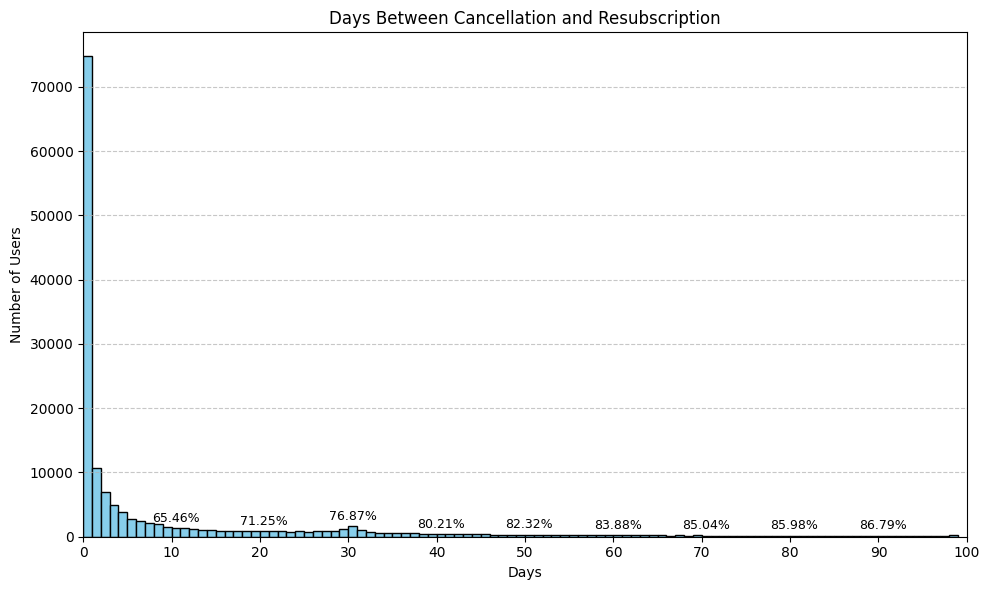

In [22]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(result_df['days_diff'], bins=range(0, 100), color='skyblue', edgecolor='black')

plt.xlim(0, 50)
plt.xticks(range(0, 101, 10))
plt.title('Days Between Cancellation and Resubscription')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

total_count = len(result_df)
x_ticks_to_label = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for x in x_ticks_to_label:
    if x >= len(bins):
        continue
    
    count_less_than_x = result_df[result_df['days_diff'] <= x].shape[0]
    proportion = count_less_than_x / total_count

    bin_index = x  
    patch = patches[bin_index]  
    
    height = patch.get_height()
    bin_center = 0.5 * (bins[bin_index] + bins[bin_index + 1])

    plt.text(
        bin_center,
        height + 1000, 
        f'{proportion:.2%}',
        ha='center',
        fontsize=9,
        rotation=0
    )

plt.tight_layout()
plt.show()

In [13]:
bins = [-1, 5, 15, np.inf]  
labels = [0, 1, 2]  
result_df['label'] = pd.cut(result_df['days_diff'], bins=bins, labels=labels, right=True)
result_df

,msno,first_cancel_date,first_resume_date,days_diff,label
0,++0nOC7BmrUTtcSboRORfg6ZXTajnBDt1f/SEgH6ONo=,2015-12-12,2015-12-15,3,0
1,++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,2015-05-04,2015-05-04,0,0
2,++5wYjoMgQHoRuD3GbbvmphZbBBwymzv5Q4l8sywtuU=,2015-05-12,2015-06-22,41,2
3,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,2015-04-25,2015-04-25,0,0
4,++A8p4GrsTnMjI6hAZEtlRsaz6s6O9ddUoH0fmS4s7s=,2015-06-12,2015-12-21,192,2
...,...,...,...,...,...
173260,zzoDlpMVa28r4EW18mzyEFDu/c/swxxeMPGLTinccc4=,2015-12-22,2015-12-23,1,0
173261,zzrwUzpM5ltYq/xjrAis0KQQAEUBE6IcBPiqFkVu2Bc=,2016-11-05,2017-01-01,57,2
173262,zzv2n8+r3LGI4gFp6c4hpseYdfHrl829IY3IlA0BF4Q=,2015-03-22,2015-05-28,67,2
173263,zzwsW1MnZalh6V5BwYE+V6hFWyKJYOf+rFd+SWVXxp8=,2015-10-09,2015-10-09,0,0


In [14]:
filtered_msno['label'] = 2
filtered_msno.set_index('msno', inplace=True)
filtered_msno = filtered_msno.drop('is_cancel', axis=1)
filtered_msno

,label
msno,
++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,2
++0nOC7BmrUTtcSboRORfg6ZXTajnBDt1f/SEgH6ONo=,2
++3FNwZTm6haRgXV0ZRonrNvMxKD9F64lQhIQmQ9wIE=,2
++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,2
++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=,2
...,...
zzxQsz+IFQArKdmrVoolrDr1UI2d2NuI5vCP2puPQdk=,2
zzxa/wrL2Ak1YxYqv218iF0XehDkxTzWkdaeXjx3jw0=,2
zzyuTnRVQQGxs0UN8qzU2Pedh3z8F7UeoiQpNhJRomM=,2


In [15]:
print(filtered_msno.isnull().sum())
print(result_df.isnull().sum())
print(filtered_msno.dtypes)
print(result_df.dtypes)

label    0
dtype: int64
msno                 0
first_cancel_date    0
first_resume_date    0
days_diff            0
label                0
dtype: int64
label    int64
dtype: object
msno                         object
first_cancel_date    datetime64[ns]
first_resume_date    datetime64[ns]
days_diff                     int64
label                      category
dtype: object


In [16]:
result_df.set_index('msno', inplace=True)
result_df['label'] = result_df['label'].astype(int)

In [17]:
filtered_msno.update(result_df[['label']])
filtered_msno['label'] = filtered_msno['label'].astype(int)
filtered_msno

,label
msno,
++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,2
++0nOC7BmrUTtcSboRORfg6ZXTajnBDt1f/SEgH6ONo=,0
++3FNwZTm6haRgXV0ZRonrNvMxKD9F64lQhIQmQ9wIE=,2
++3Z+W8OPnpbHYfrKwqRKN1bF83XEbxjdYUolhGdHZg=,0
++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=,2
...,...
zzxQsz+IFQArKdmrVoolrDr1UI2d2NuI5vCP2puPQdk=,2
zzxa/wrL2Ak1YxYqv218iF0XehDkxTzWkdaeXjx3jw0=,2
zzyuTnRVQQGxs0UN8qzU2Pedh3z8F7UeoiQpNhJRomM=,2


In [18]:
df_members['label'] = 0
df_members.set_index('msno', inplace=True)
label = df_members[['label']]
label

,label
msno,
JdmXXzLgL8NqEDBKXXPRSN6+H72vtMgzO7WQYfv3e34=,0
wzQL52h6U5ujx8F+zztPyN4bAzEVp94oZDK22HuiSmM=,0
5trzY3e8yDybNyTfz/teRrsPBGNtcVn5EKZfgYicAYs=,0
CBCUZZBicQhRyjmGuYT+EnzamYaO6PWrd7tSUsZtGzk=,0
lA0oHXFDBFn3mFA+1w8m4N/J8fBTiGqPHbhZj5OTP34=,0
...,...
78awLLRmNMqpEC3ey/6bMfP1OXLaHBfZ4ms3AiiQCZQ=,0
azPF5rd82ITb7eBTeKkg3VpA8GJzVnk6VKHauDMGoaQ=,0
aADRhKqUWBgZlEJ1zxxS24ZpmkaM6as5PXPhU/2BytM=,0


In [19]:
label.update(filtered_msno[['label']])
label.reset_index(inplace=True)
label['label'] = label['label'].astype(int)
label

C:\Users\suxin\AppData\Local\Temp\ipykernel_5420\788662609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label['label'] = label['label'].astype(int)


,msno,label
0,JdmXXzLgL8NqEDBKXXPRSN6+H72vtMgzO7WQYfv3e34=,1
1,wzQL52h6U5ujx8F+zztPyN4bAzEVp94oZDK22HuiSmM=,0
2,5trzY3e8yDybNyTfz/teRrsPBGNtcVn5EKZfgYicAYs=,0
3,CBCUZZBicQhRyjmGuYT+EnzamYaO6PWrd7tSUsZtGzk=,2
4,lA0oHXFDBFn3mFA+1w8m4N/J8fBTiGqPHbhZj5OTP34=,2
...,...,...
399995,78awLLRmNMqpEC3ey/6bMfP1OXLaHBfZ4ms3AiiQCZQ=,0
399996,azPF5rd82ITb7eBTeKkg3VpA8GJzVnk6VKHauDMGoaQ=,0
399997,aADRhKqUWBgZlEJ1zxxS24ZpmkaM6as5PXPhU/2BytM=,0
399998,eZNfGSnM3dsQFPwXnvFuBCxSwd+wxdd74/z9YFPJc6w=,0


In [118]:
label.to_csv('data/label.csv')